<a href="https://colab.research.google.com/github/Samplergithub769/EDA-on-covid19-clinical-trials/blob/main/COVID_19_Clinical_Trials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing the visualization library**

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

**importing the csv file as a dataframe**

In [30]:
df = pd.read_csv('/content/COVID clinical trials.csv')

In [31]:
df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [32]:
df.shape

(5783, 27)

In [33]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

**Explore the missing values**

In [34]:
df.isnull().sum()

,0
Rank,0
NCT Number,0
Title,0
Acronym,3303
Status,0
Study Results,0
Conditions,0
Interventions,886
Outcome Measures,35
Sponsor/Collaborators,0


**Explore the Gender distribution in the studies**

In [35]:
df['Gender'].value_counts()

,count
Gender,
All,5567
Female,162
Male,44


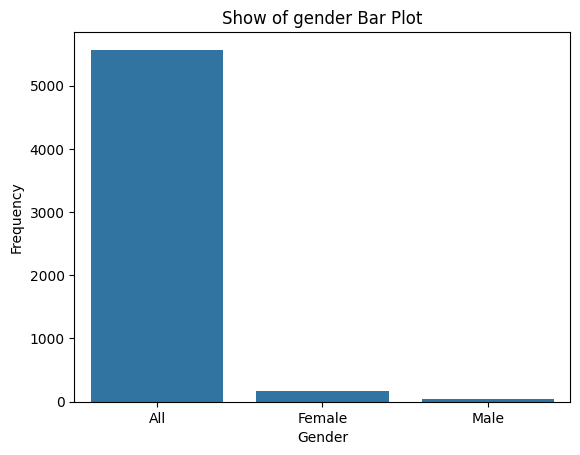

In [36]:
sns.barplot(x=df['Gender'].value_counts().index,
              y=df['Gender'].value_counts().values)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of gender Bar Plot')
plt.show()


**Exploring Study Status Distribution**

In [37]:
df['Status'].value_counts()

,count
Status,
Recruiting,2805
Completed,1025
Not yet recruiting,1004
"Active, not recruiting",526
Enrolling by invitation,181
Withdrawn,107
Terminated,74
Suspended,27
Available,19


<Axes: xlabel='count', ylabel='Status'>

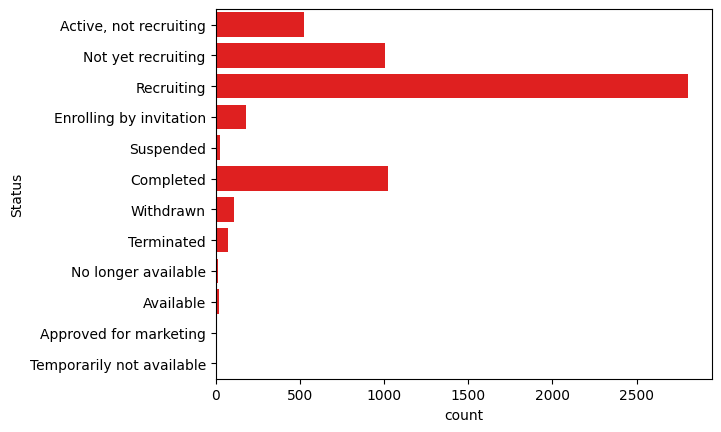

In [38]:
sns.countplot(y="Status", data=df, color="red")

**Cleaninig Age Column**

In [39]:
df.Age.unique()

array(['18 Years and older \xa0 (Adult, Older Adult)',
       'Child, Adult, Older Adult', '18 Years to 48 Years \xa0 (Adult)',
       '18 Years to 75 Years \xa0 (Adult, Older Adult)',
       '18 Years to 45 Years \xa0 (Adult)',
       '18 Years to 99 Years \xa0 (Adult, Older Adult)',
       '18 Years to 55 Years \xa0 (Adult)',
       '15 Years and older \xa0 (Child, Adult, Older Adult)',
       '18 Years to 80 Years \xa0 (Adult, Older Adult)',
       '45 Years and older \xa0 (Adult, Older Adult)',
       '20 Years to 100 Years \xa0 (Adult, Older Adult)',
       '8 Years to 88 Years \xa0 (Child, Adult, Older Adult)',
       '5 Years to 65 Years \xa0 (Child, Adult, Older Adult)',
       'up to 99 Years \xa0 (Child, Adult, Older Adult)',
       '18 Years to 85 Years \xa0 (Adult, Older Adult)',
       '18 Years to 65 Years \xa0 (Adult, Older Adult)',
       'up to 29 Days \xa0 (Child)',
       '18 Years to 70 Years \xa0 (Adult, Older Adult)',
       '18 Years to 59 Years \xa0 (Adult)',
  

In [40]:
from string import digits

def remove_digits(text):
    return text.translate(str.maketrans('', '', digits))

df["Age"] = df["Age"].apply(lambda text: remove_digits(text))
df[['Age']].head()


,Age
0,"Years and older (Adult, Older Adult)"
1,"Years and older (Adult, Older Adult)"
2,"Years and older (Adult, Older Adult)"
3,"Child, Adult, Older Adult"
4,Years to Years (Adult)


In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])


df["Age"] = df["Age"].apply(lambda text: remove_stopwords(text))
df[['Age']].head()

,Age
0,"Years older (Adult, Older Adult)"
1,"Years older (Adult, Older Adult)"
2,"Years older (Adult, Older Adult)"
3,"Child, Adult, Older Adult"
4,Years Years (Adult)


In [43]:
df.Age.unique()

array(['Years older (Adult, Older Adult)', 'Child, Adult, Older Adult',
       'Years Years (Adult)', 'Years Years (Adult, Older Adult)',
       'Years older (Child, Adult, Older Adult)',
       'Years Years (Child, Adult, Older Adult)',
       'Years (Child, Adult, Older Adult)', 'Days (Child)',
       'Years (Child, Adult)', 'Years older (Older Adult)',
       'Years Years (Child, Adult)', 'Years (Child)',
       'Months older (Child, Adult, Older Adult)',
       'Year Years (Child, Adult, Older Adult)', 'Years Years (Child)',
       'Months Years (Child, Adult, Older Adult)', 'Minutes (Child)',
       'Weeks Weeks (Child)', 'Year older (Child, Adult, Older Adult)',
       'Month Years (Child, Adult, Older Adult)', 'Year Years (Child)',
       'Year Years (Child, Adult)', 'Month Years (Child, Adult)',
       'Month Years (Child)', 'Hours (Child)', 'Months (Child)',
       'Months Years (Child, Adult)', 'Years Years (Older Adult)',
       'Months older (Adult, Older Adult)', 'Months Y

In [44]:
df["Age"]=df["Age"].apply(lambda x:str(x).replace('Years','')if 'Years' in str(x) else str(x))
df["Age"]=df["Age"].apply(lambda x:str(x).replace('Year','')if 'Year' in str(x) else str(x))

In [45]:
df.Age.unique()

array([' older (Adult, Older Adult)', 'Child, Adult, Older Adult',
       '  (Adult)', '  (Adult, Older Adult)',
       ' older (Child, Adult, Older Adult)',
       '  (Child, Adult, Older Adult)', ' (Child, Adult, Older Adult)',
       'Days (Child)', ' (Child, Adult)', ' older (Older Adult)',
       '  (Child, Adult)', ' (Child)',
       'Months older (Child, Adult, Older Adult)', '  (Child)',
       'Months  (Child, Adult, Older Adult)', 'Minutes (Child)',
       'Weeks Weeks (Child)', 'Month  (Child, Adult, Older Adult)',
       'Month  (Child, Adult)', 'Month  (Child)', 'Hours (Child)',
       'Months (Child)', 'Months  (Child, Adult)', '  (Older Adult)',
       'Months older (Adult, Older Adult)', 'Months  (Child)',
       'Days  (Child, Adult)', 'Month (Child)',
       'Month older (Child, Adult, Older Adult)', 'Weeks  (Child, Adult)',
       'Months Months (Child)', 'Days older (Child, Adult, Older Adult)'],
      dtype=object)

In [46]:
df["Age"]=df["Age"].apply(lambda x:str(x).replace('Months','')if 'Months' in str(x) else str(x))
df["Age"]=df["Age"].apply(lambda x:str(x).replace('Month','')if 'Month' in str(x) else str(x))
df["Age"]=df["Age"].apply(lambda x:str(x).replace('Days','')if 'Days' in str(x) else str(x))
df["Age"]=df["Age"].apply(lambda x:str(x).replace('Weeks','')if 'Weeks' in str(x) else str(x))
df["Age"]=df["Age"].apply(lambda x:str(x).replace('Hours','')if 'Hours' in str(x) else str(x))

In [47]:
df.Age.unique()

array([' older (Adult, Older Adult)', 'Child, Adult, Older Adult',
       '  (Adult)', '  (Adult, Older Adult)',
       ' older (Child, Adult, Older Adult)',
       '  (Child, Adult, Older Adult)', ' (Child, Adult, Older Adult)',
       ' (Child)', ' (Child, Adult)', ' older (Older Adult)',
       '  (Child, Adult)', '  (Child)', 'Minutes (Child)',
       '  (Older Adult)'], dtype=object)

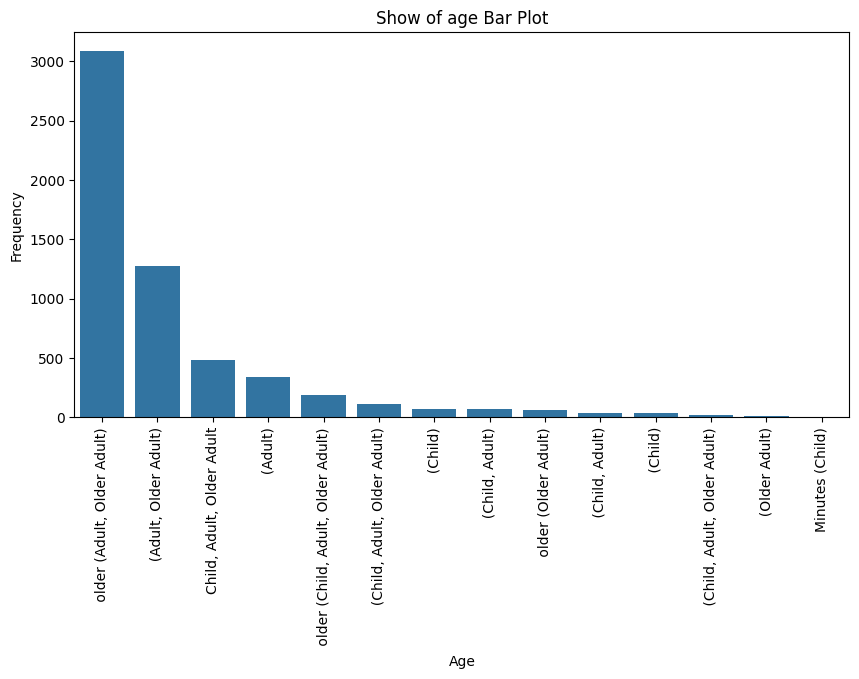

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Age'].value_counts().index,
              y=df['Age'].value_counts().values)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Show of age Bar Plot')
plt.xticks(rotation=90)
plt.show()

In [49]:
i = 0
fig = make_subplots(rows=3, cols=2, subplot_titles=list(pd.DataFrame(df.groupby(['Age'])['Gender'].value_counts()).unstack().index))
for row in range(1,4):
    for col in range(1,3):
        dt = pd.DataFrame(df.groupby(['Age'])['Gender'].value_counts()).unstack().iloc[i]
        # Check if dt is a Series and convert it to DataFrame if necessary
        if isinstance(dt, pd.Series):
            dt = dt.to_frame(name='Gender')
            #This converts it to a DataFrame with 'Gender' as column name.
        fig.add_trace(go.Bar(x=dt.index, y=dt.Gender.values), row=row, col=col) #Use dt.index instead of dt.Gender.index
        i+=1
fig.show()

**Exploring Study Results**

In [50]:
import plotly.express as px
fig = px.pie(df,'Study Results')
fig.update_layout(title='Do we have any results to study?')
fig.show()

**Exploring Study Phases**

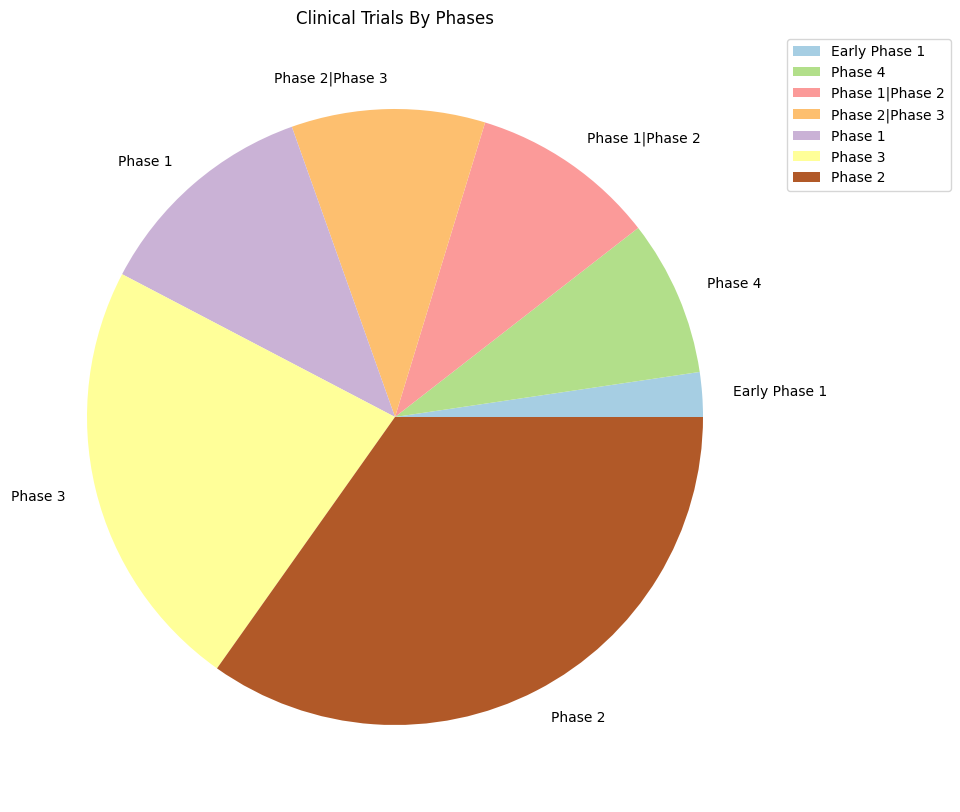

In [51]:
# Pie chart of clinical trial phases (excluding 'Not Applicable')
df[df['Phases'] != 'Not Applicable']['Phases'].value_counts().sort_values().plot(
    kind='pie', figsize=(20, 10), colormap='Paired', title='Clinical Trials By Phases', legend=True
)
plt.legend(bbox_to_anchor=(1.0, 1.0))# Places the legend outside top-right
plt.ylabel('')# Removes the default y-axis label
plt.show()# Displays the plot

**Interventional Studies**

In [52]:
df.Interventions.unique()

array(['Diagnostic Test: ID Now™ COVID-19 Screening Test',
       'Drug: Drug COVID19-0001-USR|Drug: normal saline',
       'Other: Lung CT scan analysis in COVID-19 patients', ...,
       'Other: Antibiotic treatment|Other: No antibiotic treatment',
       'Behavioral: Yoga',
       'Behavioral: Brief Cognitive Behavioral Therapy for Chronic Pain (BCBT-CP)|Other: BCBT-CP Booster'],
      dtype=object)

<Axes: title={'center': 'Top 5 Drugs tested'}, ylabel='Interventions'>

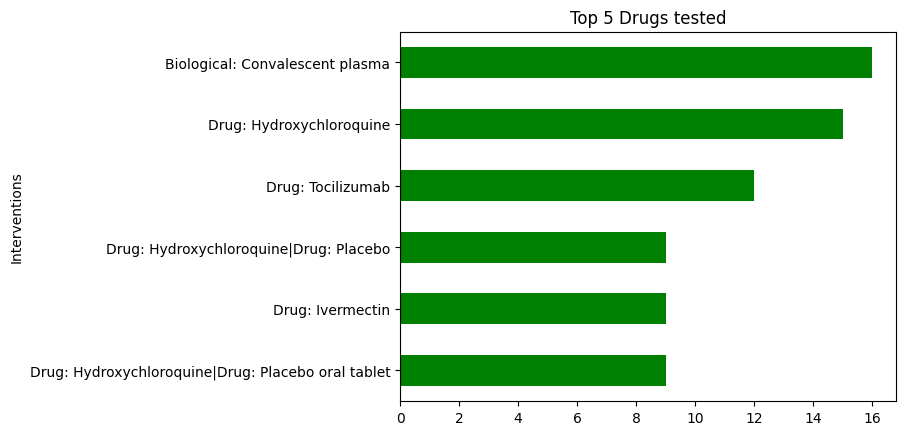

In [53]:
interventions = df[df['Study Type']=='Interventional']
interventions['Interventions'].value_counts().head(6).sort_values().plot(kind='barh', color='g', title='Top 5 Drugs tested')


In [54]:
df = df.ffill(axis = 1)
df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021","March 8, 2021","March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020","October 20, 2020","October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia","Cimedical, Barranquilla, Atlantico, Colombia",https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020","May 20, 2020","November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020","June 4, 2020","June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020","May 20, 2020","June 4, 2020","CHR Orléans, Orléans, France","CHR Orléans, Orléans, France",https://ClinicalTrials.gov/show/NCT04395924


In [55]:
df.isnull().sum()

,0
Rank,0
NCT Number,0
Title,0
Acronym,0
Status,0
Study Results,0
Conditions,0
Interventions,0
Outcome Measures,0
Sponsor/Collaborators,0


**Clinical Trials Distribution By Country**

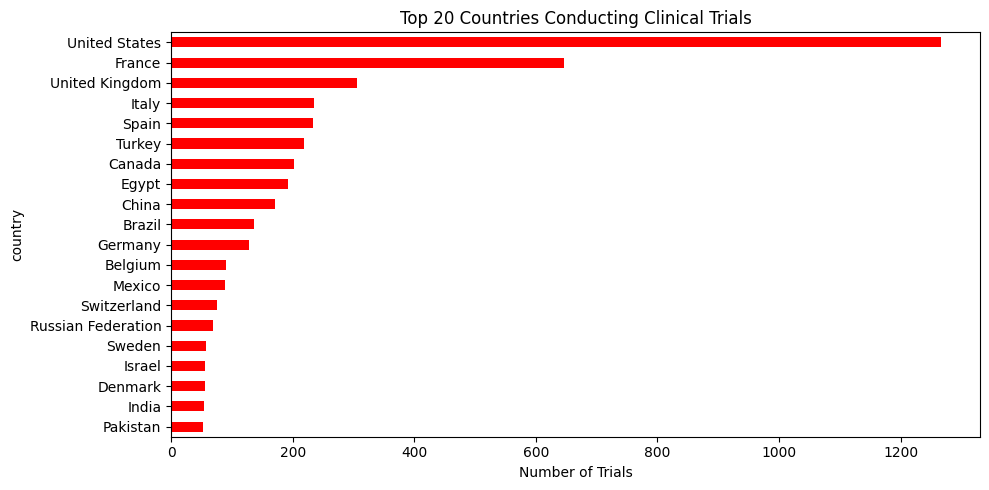

In [56]:
# Extract country from 'Locations' column
df['country'] = df['Locations'].astype(str).apply(lambda x: x.split(',')[-1].strip())

# Remove numeric values accidentally interpreted as countries (like '2020', '2021')
df['country'] = df['country'].apply(lambda x: x if not x.isdigit() else None)

# Recalculate top 20 countries after cleaning
top_countries = df['country'].value_counts().head(20)

# Plot the horizontal bar chart
top_countries.sort_values().plot(
    kind='barh',
    color='red',
    figsize=(10, 5),
    title='Top 20 Countries Conducting Clinical Trials'
)

plt.xlabel('Number of Trials')
plt.tight_layout()
plt.show()




In [57]:
# Choropleth Map
country_data = df['country'].value_counts().reset_index()
country_data.columns = ['Country', 'Trial_Count']
country_data['Country'] = country_data['Country'].str.strip()

fig = px.choropleth(
    country_data,
    locations="Country",
    locationmode="country names",
    color="Trial_Count",
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Clinical Trial Distribution by Country"
)

fig.update_layout(
    title_x=0.5,
    geo=dict(showframe=False, showcoastlines=False),
    coloraxis_colorbar=dict(
        title="Trial Count",
        ticks="outside",
        tickformat=","
    )
)

fig.show()



**Distribution of Clinical Trial Funders**

<ipython-input-58-ed5a78cf4777>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




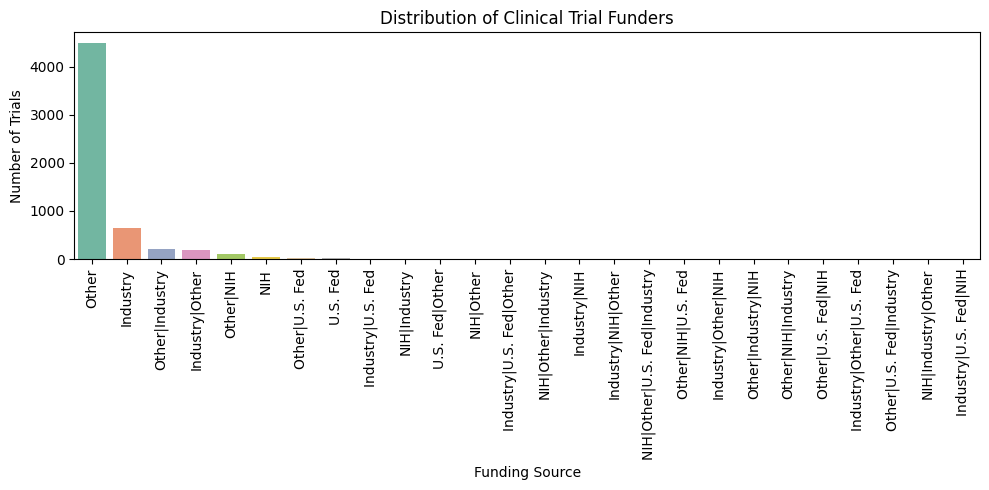

In [58]:
# Bar plot of all funding sources using Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(
    x=df['Funded Bys'].value_counts().index,
    y=df['Funded Bys'].value_counts().values,
    palette='Set2'
)
plt.xlabel('Funding Source')
plt.ylabel('Number of Trials')
plt.title('Distribution of Clinical Trial Funders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Explore

**Distribution of Study Types in COVID-19 Clinical Trials**

In [59]:
import plotly.express as px
fig = px.pie(df,'Study Type')
fig.update_layout(title='Distribution of Study Types in Clinical Trials')
fig.show()

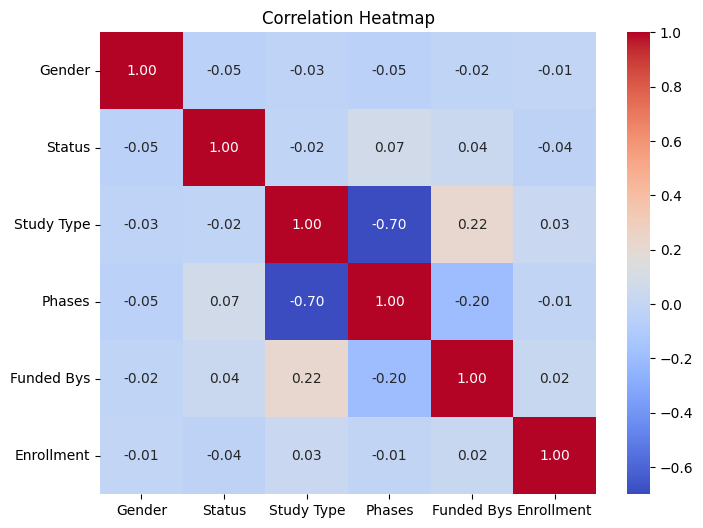

In [60]:
# First, convert categorical to numeric
df_corr = df.copy()

# Example: Encode 'Gender', 'Status', 'Study Type' numerically
df_corr['Gender'] = df_corr['Gender'].astype('category').cat.codes
df_corr['Status'] = df_corr['Status'].astype('category').cat.codes
df_corr['Study Type'] = df_corr['Study Type'].astype('category').cat.codes
df_corr['Phases'] = df_corr['Phases'].astype('category').cat.codes
df_corr['Funded Bys'] = df_corr['Funded Bys'].astype('category').cat.codes

# Convert Enrollment to numeric, coercing errors to NaN
df_corr['Enrollment'] = pd.to_numeric(df_corr['Enrollment'], errors='coerce')

# Compute correlation
corr = df_corr[['Gender', 'Status', 'Study Type', 'Phases', 'Funded Bys', 'Enrollment']].corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
